In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [3]:
# Get data - it is already split into training and testing sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [5]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
# Reshape Data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [11]:
# Step 1: Define our network structure
# Save the input shape
input_shape = X_train.shape[1:4]
input_shape

(28, 28)

In [ ]:
# Sequential model
model = Sequential()

In [ ]:
# Convolutional layer
model.add(Conv2D(filters = 8, # How many filters you wnat to use
                 kernel_size = 3, # size of each filter
                 input_shape = input_shape )) # What is the shape of your input features (we defined this above)
# Pooling layer
model.add(MaxPooling2D(pool_size = 2)) # Size of pooling
# Flattening layer
model.add(Flatten())
# Output layer
model.add(Dense(10, # How many output possibilities we have 
                activation = 'softmax')) # What activation function are you using?

In [ ]:
# Step 2: Compile
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [ ]:
# Step 3: Fit our model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=20)

Epoch 1/20
1875/1875 [==============================] - 26s 13ms/step - loss: 0.3623 - acc: 0.8986 - val_loss: 0.2531 - val_acc: 0.9287
Epoch 2/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2146 - acc: 0.9397 - val_loss: 0.1771 - val_acc: 0.9501
Epoch 3/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1637 - acc: 0.9531 - val_loss: 0.1482 - val_acc: 0.9597
Epoch 4/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1270 - acc: 0.9637 - val_loss: 0.1240 - val_acc: 0.9651
Epoch 5/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1027 - acc: 0.9702 - val_loss: 0.1031 - val_acc: 0.9692
Epoch 6/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0873 - acc: 0.9747 - val_loss: 0.0945 - val_acc: 0.9708
Epoch 7/20
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0767 - acc: 0.9775 - val_loss: 0.0847 - val_acc: 0.9761
Epoch 8/20
1875/1875 [==========================

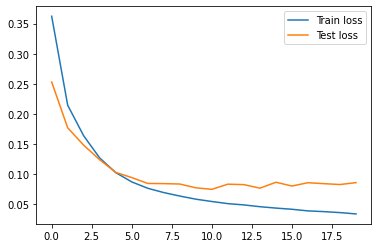

In [ ]:
# Visualize the loss
plt.plot(history.history['loss'], label = 'Train loss')
plt.plot(history.history['val_loss'], label = 'Test loss')
plt.legend();

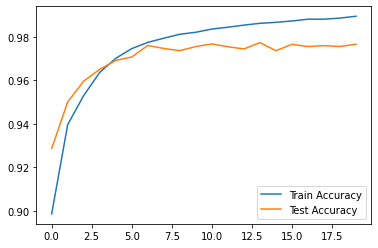

In [ ]:
# Visualize the accuracy
plt.plot(history.history['acc'], label = 'Train Accuracy')
plt.plot(history.history['val_acc'], label = 'Test Accuracy')
plt.legend();